In [4]:
# Import important libraries

import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt

In [2]:
# Making accessible to google drive

from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Reading the dataset

df = pd.read_csv('/content/drive/My Drive/advertising.csv')
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


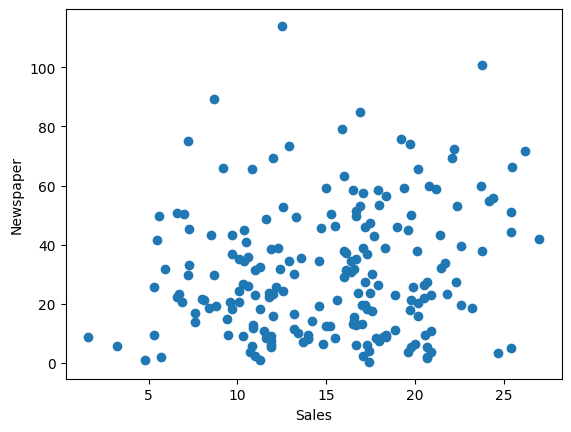

In [13]:
# Relationship between datasets

plt.scatter(df['Sales'], df['Newspaper'])
plt.xlabel('Sales')
plt.ylabel('Newspaper')
plt.show()

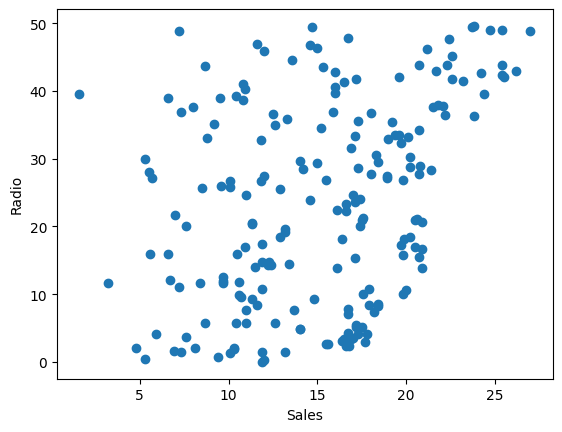

In [12]:
plt.scatter(df['Sales'], df['Radio'])
plt.xlabel('Sales')
plt.ylabel('Radio')
plt.show()

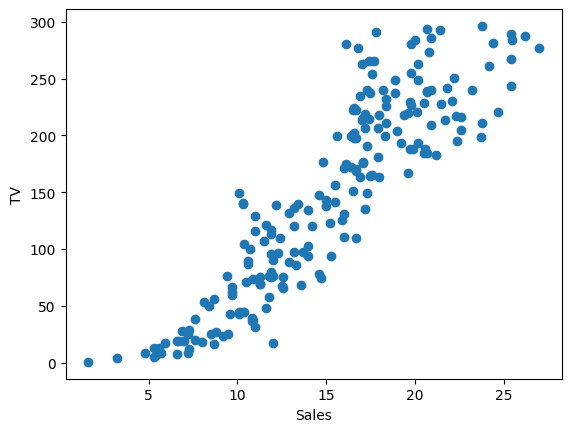

In [11]:
plt.scatter(df['Sales'], df['TV'])
plt.xlabel('Sales')
plt.ylabel('TV')
plt.show()

In [14]:
# Simple linear relation ship between Sales and TV, Thus apply Simple Linear Regression to build this model

In [15]:
# Important Column in dataset to train model

cdf = df['TV']
cdf.head(9)

0    230.1
1     44.5
2     17.2
3    151.5
4    180.8
5      8.7
6     57.5
7    120.2
8      8.6
Name: TV, dtype: float64

In [16]:
# Spliting Random dataset into training = 80% and testing = 20%

msk = np.random.rand(len(df)) < 0.8
train = df[msk]
test = df[~msk]

In [18]:
# Modeling
from sklearn import linear_model
regr = linear_model.LinearRegression()
train_x = np.asanyarray(train[['TV']])
train_y = np.asanyarray(train[['Sales']])
regr.fit(train_x, train_y)

# The coefficients
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)

Coefficients:  [[0.05510506]]
Intercept:  [7.11741777]


Text(0, 0.5, 'Sales')

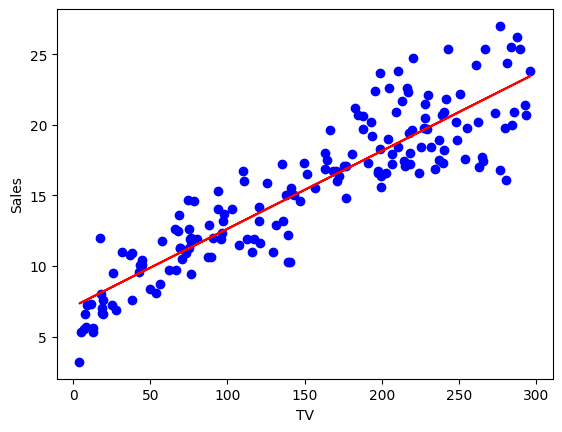

In [19]:
# Vsualize linear line over scatter plot
plt.scatter(train.TV, train.Sales,  color='blue')
plt.plot(train_x, regr.coef_*train_x + regr.intercept_, color = "red")
plt.xlabel("TV")
plt.ylabel("Sales")

In [20]:
# Testing the model over testing dataset and calculating different error
from sklearn.metrics import r2_score

test_x = np.asanyarray(test[['TV']])
test_y = np.asanyarray(test[['Sales']])
test_y_ = regr.predict(test_x)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_ - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_ - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y , test_y_) )

Mean absolute error: 1.90
Residual sum of squares (MSE): 5.62
R2-score: 0.79
